# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys_file import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# # use this when i try to re-run from the top, so that I don't have to keep running 600+ data everytime
# cities = pd.read_csv("eather_data_final.csv")
# cities = list(cities["City"])
# cities

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# creating a blank list for these variables 
city_name = []
lat = []
lng = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

weather_url = "http://api.openweathermap.org/data/2.5/weather?"

# starting the loop
# imperial syntax will give weather in F 
# &q= queries of the city 
# slicing the city by using [0:2], means we are slicing into 2 cities -> for city in cities[0:2]:
# use pprint to list it in a nicer form
# time.sleep is running 1.1 second of pause so we dont go over limit of 600 calls per minutes 
print("Beginning Data Retrieval")     
print("-----------------------------")

record = 1

for city in cities:
        url = weather_url + "appid=" +  weather_api_key + "&q=" + city + "&units=imperial"
        response = requests.get(url).json()
    #     pprint(response)
        try:
            time.sleep(1.1)
            city_name.append(response["name"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            max_temperature.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind_speed.append(response["wind"]["speed"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            print(f" Processing Record {record} | {city}") 
            record +=1
        except: 
            print("City not found. Skipping...")

# loop will break if the city isnt in the weather map



Beginning Data Retrieval
-----------------------------
 Processing Record 1 | richards bay
 Processing Record 2 | khatanga
 Processing Record 3 | bredasdorp
 Processing Record 4 | korla
 Processing Record 5 | tasiilaq
 Processing Record 6 | albany
City not found. Skipping...
 Processing Record 7 | chokurdakh
 Processing Record 8 | saskylakh
 Processing Record 9 | phuket
 Processing Record 10 | port arthur
 Processing Record 11 | mecca
 Processing Record 12 | broken hill
 Processing Record 13 | dalmatovo
 Processing Record 14 | san patricio
 Processing Record 15 | port lincoln
 Processing Record 16 | carnarvon
 Processing Record 17 | husavik
 Processing Record 18 | busselton
 Processing Record 19 | troitskiy
 Processing Record 20 | bluff
 Processing Record 21 | kongolo
 Processing Record 22 | nikolskoye
 Processing Record 23 | nyurba
 Processing Record 24 | mataura
 Processing Record 25 | airai
 Processing Record 26 | hobart
 Processing Record 27 | dubbo
 Processing Record 28 | zhangjia

 Processing Record 225 | boyolangu
 Processing Record 226 | huruta
 Processing Record 227 | gat
 Processing Record 228 | gigmoto
City not found. Skipping...
 Processing Record 229 | hamilton
 Processing Record 230 | santa cruz del norte
 Processing Record 231 | chibombo
 Processing Record 232 | kapuskasing
 Processing Record 233 | cherskiy
 Processing Record 234 | portland
 Processing Record 235 | tortoli
 Processing Record 236 | esperance
 Processing Record 237 | pangkalanbuun
 Processing Record 238 | liverpool
 Processing Record 239 | bubaque
 Processing Record 240 | yakeshi
 Processing Record 241 | clinton
 Processing Record 242 | arbazh
 Processing Record 243 | kigoma
 Processing Record 244 | selma
 Processing Record 245 | brno
 Processing Record 246 | burnie
 Processing Record 247 | tinskoy
 Processing Record 248 | puerto leguizamo
 Processing Record 249 | fernie
 Processing Record 250 | yulara
 Processing Record 251 | tripoli
 Processing Record 252 | hofn
 Processing Record 253 |

 Processing Record 454 | horizontina
 Processing Record 455 | nouna
 Processing Record 456 | cap-aux-meules
 Processing Record 457 | hohhot
 Processing Record 458 | channel-port aux basques
City not found. Skipping...
 Processing Record 459 | eenhana
 Processing Record 460 | izhma
 Processing Record 461 | comodoro rivadavia
 Processing Record 462 | andros town
 Processing Record 463 | sur
 Processing Record 464 | penzance
 Processing Record 465 | sorland
 Processing Record 466 | fushe-arrez
 Processing Record 467 | kamenka
 Processing Record 468 | sisimiut
 Processing Record 469 | banjar
 Processing Record 470 | acarau
 Processing Record 471 | tshikapa
 Processing Record 472 | surt
 Processing Record 473 | banff
 Processing Record 474 | kuusamo
 Processing Record 475 | datong
 Processing Record 476 | anjozorobe
City not found. Skipping...
 Processing Record 477 | takoradi
 Processing Record 478 | pasighat
 Processing Record 479 | jonuta
 Processing Record 480 | kununurra
 Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#creating the dataframe 

weather_1_df = pd.DataFrame({
                            "City": city_name,
                            "Lat": lat,
                            "Lng": lng,
                            "Max Temp": max_temperature,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": date})

weather_1_df.head()

# Save data frame to CSV
weather_1_df.to_csv("weather_data_final.csv", encoding="utf-8", index=False)
weather_1_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Richards Bay,-28.78,32.04,70.50,87,93,4.18,ZA,1606087303
1,Khatanga,71.97,102.50,14.92,96,100,20.38,RU,1606087379
2,Bredasdorp,-34.53,20.04,60.80,87,26,3.36,ZA,1606087229
3,Korla,41.76,86.15,18.10,80,40,3.47,CN,1606087382
4,Tasiilaq,65.61,-37.64,21.20,85,46,2.24,GL,1606087383
...,...,...,...,...,...,...,...,...,...
591,Chapais,49.78,-74.85,17.60,85,75,6.93,CA,1606088223
592,Bela,25.93,81.98,56.48,37,38,2.59,IN,1606088224
593,Innisfail,-17.53,146.03,77.00,60,15,8.01,AU,1606088225
594,Korba,22.35,82.68,54.90,48,0,5.14,IN,1606088227


In [6]:
#drop out null value, just in case there is one
weather_1_df.dropna(inplace = True) 
# weather_1_df.head()

In [7]:
weather_1_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,5.960000e+02
mean,21.215671,23.162131,53.402617,75.669463,53.785235,7.470638,1.606088e+09
std,32.625824,89.037432,26.025401,19.006495,39.126954,5.401519,2.619606e+02
min,-54.800000,-179.170000,-24.500000,1.000000,0.000000,0.020000,1.606087e+09
25%,-3.862500,-53.077500,32.000000,68.750000,13.750000,3.485000,1.606088e+09
50%,25.595000,26.790000,60.880000,81.000000,63.500000,6.025000,1.606088e+09
75%,48.197500,104.092500,75.287500,89.000000,90.000000,10.290000,1.606088e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,44.740000,1.606088e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:


weather_1_df.loc[weather_1_df['Humidity'] > 100]

#no cities that have humidity >100%


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

11/22/2020


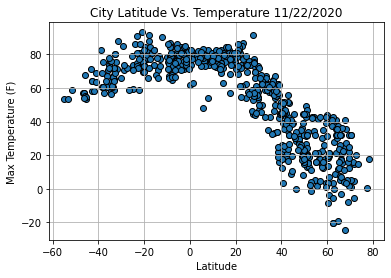

In [49]:
# displaying today's date by using datetime syntax 
from datetime import datetime
thistime = datetime.now().strftime("%m/%d/%Y")
print(thistime)


# Setting up the X and Y axis 
x_axis = weather_1_df['Lat']
y_axis = weather_1_df['Max Temp']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors="black")

# giving the name to the x and y label
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# adding the grid
plt.grid()

# adding the title and today's date
plt.title("City Latitude Vs. Temperature " +thistime+"")

plt.savefig('Latitude-Temperature.jpg')

## Latitude vs. Humidity Plot

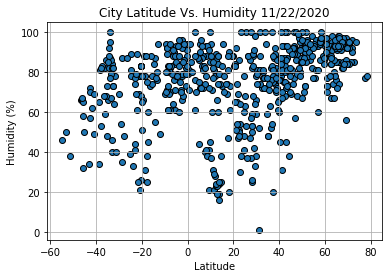

In [50]:
# Setting up the X and Y axis 
x_axis = weather_1_df['Lat']
y_axis = weather_1_df['Humidity']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors="black")

# giving the name to the x and y label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# adding the grid
plt.grid()

# adding the title and today's date
plt.title("City Latitude Vs. Humidity " +thistime+"")

plt.savefig('Latitude-Humidity.jpg')


## Latitude vs. Cloudiness Plot

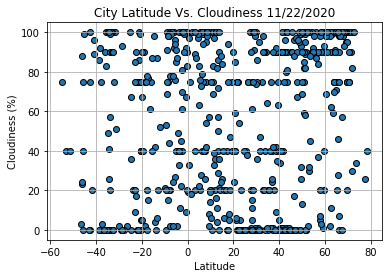

In [51]:
# Setting up the X and Y axis 
x_axis = weather_1_df['Lat']
y_axis = weather_1_df['Cloudiness']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors="black")

# giving the name to the x and y label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# adding the grid
plt.grid()

# adding the title and today's date
plt.title("City Latitude Vs. Cloudiness " +thistime+"")


plt.savefig('Latitude-Cloudiness.jpg')


## Latitude vs. Wind Speed Plot

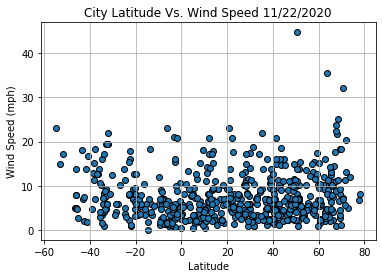

In [52]:
# Setting up the X and Y axis 
x_axis = weather_1_df['Lat']
y_axis = weather_1_df['Wind Speed']

# making a scatter plot
plt.scatter(x_axis, y_axis, edgecolors="black")

# giving the name to the x and y label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# adding the grid
plt.grid()

# adding the title and today's date
plt.title("City Latitude Vs. Wind Speed " +thistime+"")

plt.savefig('Latitude-Wind Speed.jpg')



## Linear Regression

In [16]:
import scipy.stats as st

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
# Making new dataframe to filter out the data based on Northern and Southern Hemisphere

# Northern Hemisphere will have positive latitude, thus latitude > 0
northern_hemisphere_df = weather_1_df.loc[weather_1_df["Lat"] >= 0]
# this code will extract all the cities that were in Northern Hemisphere- 423 cities
northern_hemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Khatanga,71.97,102.50,14.92,96,100,20.38,RU,1606087379
3,Korla,41.76,86.15,18.10,80,40,3.47,CN,1606087382
4,Tasiilaq,65.61,-37.64,21.20,85,46,2.24,GL,1606087383
5,Albany,42.60,-73.97,39.00,68,100,9.82,US,1606087384
6,Chokurdakh,70.63,147.92,1.22,94,100,7.31,RU,1606087247


The r-value is: -0.87


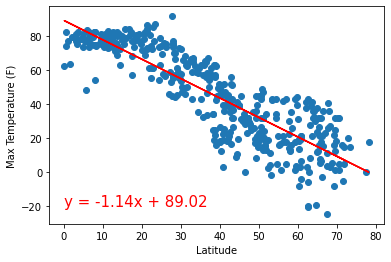

<Figure size 432x288 with 0 Axes>

In [53]:
# Setting up x and y axis 
x_axis = northern_hemisphere_df['Lat']
y_axis = northern_hemisphere_df['Max Temp']

# giving the name to the x and y label
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

# go back up and add this (if you have not done so at the beginning) -> import scipy.stats as st

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.show()

plt.savefig('Northern-Latitude-Temperature.jpg')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
# Southern Hemisphere will have negative latitude, thus latitude <= 0
southern_hemisphere_df = weather_1_df.loc[weather_1_df["Lat"] <= 0]
# this code will extract all the cities that were in Southern Hemisphere- 173 cities
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Richards Bay,-28.78,32.04,70.50,87,93,4.18,ZA,1606087303
2,Bredasdorp,-34.53,20.04,60.80,87,26,3.36,ZA,1606087229
11,Broken Hill,-31.95,141.43,71.60,78,100,21.92,AU,1606087393
14,Port Lincoln,-34.73,135.87,62.58,66,49,16.11,AU,1606087397
15,Carnarvon,-24.87,113.63,73.40,78,0,11.41,AU,1606087259


The r-value is: 0.6


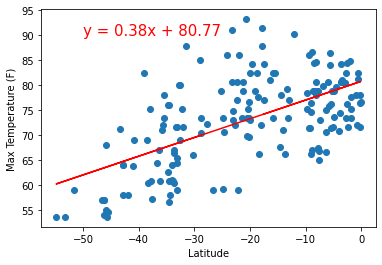

<Figure size 432x288 with 0 Axes>

In [54]:
# Setting up x and y axis 
x_axis = southern_hemisphere_df['Lat']
y_axis = southern_hemisphere_df['Max Temp']

# giving the name to the x and y label
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

# go back up and add this (if you have not done so at the beginning) -> import scipy.stats as st

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.show()


plt.savefig('Southern-Latitude-Temperature.jpg')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42


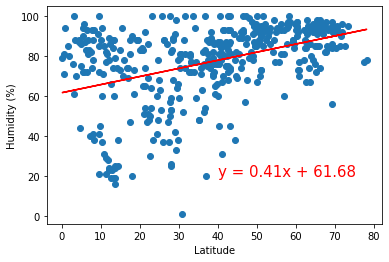

<Figure size 432x288 with 0 Axes>

In [55]:
# Setting up x and y axis 
x_axis = northern_hemisphere_df['Lat']
y_axis = northern_hemisphere_df['Humidity']

# giving the name to the x and y label
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

# go back up and add this (if you have not done so at the beginning) -> import scipy.stats as st

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.show()


plt.savefig('Northern-Latitude-Humidity.jpg')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.36


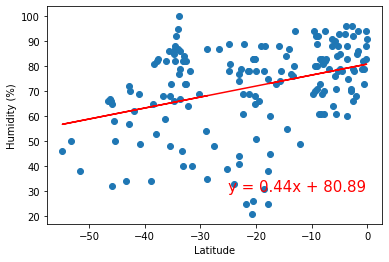

<Figure size 432x288 with 0 Axes>

In [56]:
# Setting up x and y axis 
x_axis = southern_hemisphere_df['Lat']
y_axis = southern_hemisphere_df['Humidity']

# giving the name to the x and y label
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

# go back up and add this (if you have not done so at the beginning) -> import scipy.stats as st

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.show()

plt.savefig('Souththern-Latitude-Humidity.jpg')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24


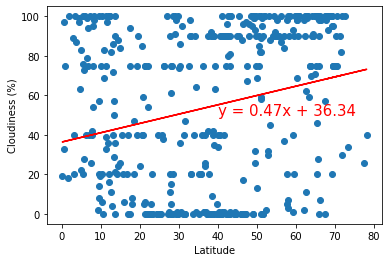

<Figure size 432x288 with 0 Axes>

In [57]:
# Setting up x and y axis 
x_axis = northern_hemisphere_df['Lat']
y_axis = northern_hemisphere_df['Cloudiness']

# giving the name to the x and y label
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

# go back up and add this (if you have not done so at the beginning) -> import scipy.stats as st

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.show()

plt.savefig('Northern-Latitude-Cloudiness.jpg')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16


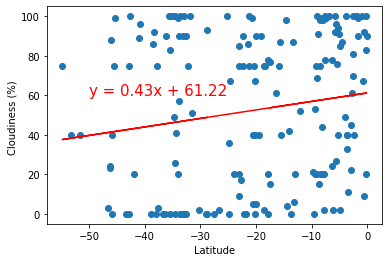

<Figure size 432x288 with 0 Axes>

In [58]:
# Setting up x and y axis 
x_axis = southern_hemisphere_df['Lat']
y_axis = southern_hemisphere_df['Cloudiness']

# giving the name to the x and y label
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%) ")

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

# go back up and add this (if you have not done so at the beginning) -> import scipy.stats as st

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.show()

plt.savefig('Souththern-Latitude-Cloudiness.jpg')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.16


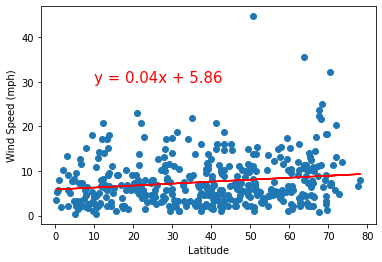

<Figure size 432x288 with 0 Axes>

In [59]:
# Setting up x and y axis 
x_axis = northern_hemisphere_df['Lat']
y_axis = northern_hemisphere_df['Wind Speed']

# giving the name to the x and y label
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

# go back up and add this (if you have not done so at the beginning) -> import scipy.stats as st

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()

plt.savefig('Northern-Latitude-WindSpeed.jpg')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.33


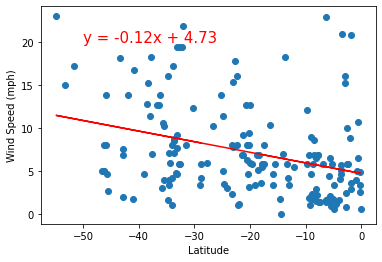

<Figure size 432x288 with 0 Axes>

In [60]:
# Setting up x and y axis 
x_axis = southern_hemisphere_df['Lat']
y_axis = southern_hemisphere_df['Wind Speed']

# giving the name to the x and y label
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is: {round(correlation[0],2)}")

# go back up and add this (if you have not done so at the beginning) -> import scipy.stats as st

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

plt.savefig('Southern-Latitude-WindSpeed.jpg')